In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import os

Specify which folder you want to work on, load trajectories

In [2]:
os.chdir('/home/fkopczynski/paper_cadherin/plastic/ps/ps20.amb2gmx/md')

In [3]:
traj = md.load("dry.xtc", top="dry.gro")
top = traj.top
sodium = top.select('resname NA')
carboxy = top.select('resname PSC HSC TSC and name O2')
neighbors = md.compute_neighbors(traj, 0.3, sodium, haystack_indices=carboxy)
frames_with_neighbors = sum(len(frame_neighbors) > 0 for frame_neighbors in neighbors)

Sodium interaction

In [8]:
print(f"Number of frames with sodium within 3 angstroms of PSC: {frames_with_neighbors}")
fraction = frames_with_neighbors * 100 / len(traj)
print(f"For {len(traj)} frames considered, sodium is in contact with PSC {fraction:.1f}% time")

Number of frames with sodium within 3 angstroms of PSC: 33
For 51 frames considered, sodium is in contact with PSC 64.7% time


In [9]:
points_ini = traj.xyz[0]
vol_ini = scipy.spatial.ConvexHull(points_ini).volume
print(vol_ini)

430.2249174831059


In [10]:
points_fin = traj.xyz[-1]
vol_fin = scipy.spatial.ConvexHull(points_fin).volume
print(vol_fin)

501.61529701599443


Volume calculation

In [4]:
def calc_mass(topology=top):
    '''Calculates atomic mass of a molecule containing only C, H and O'''
    m = 0
    table, bonds = top.to_dataframe()
    for el in table['element']:
        if el == 'C':
            m += 12
        elif el == 'O':
            m += 16
        elif el == 'H':
            m += 1
    return m

a. considering all atoms

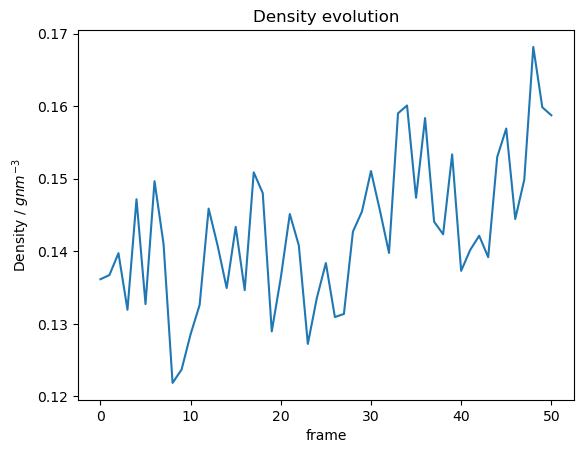

In [11]:
densities = []
snapshots = range(traj.xyz.shape[0])

m = calc_mass(top)

for snap in snapshots:
    points = traj.xyz[snap]
    vol = scipy.spatial.ConvexHull(points).volume
    d = vol / m
    densities.append(d)

pl, ax  = plt.subplots()
ax.set_title('Density evolution')
ax.set_xlabel('frame')
ax.set_ylabel("Density / $g nm^{-3}$")
ax.plot(snapshots, densities)
pl.show()


b. considering only backbone atoms of the polymer chain

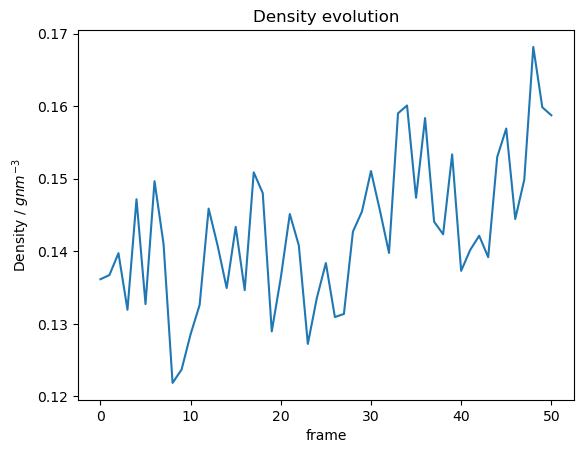

In [12]:
# only backbone atoms
backbone = top.select('name C1 C2')

densities = []
snapshots = range(traj.xyz.shape[0])

m = calc_mass(backbone)

for snap in snapshots:
    points = traj.xyz[snap]
    vol = scipy.spatial.ConvexHull(points).volume
    d = vol / m
    densities.append(d)

pl, ax  = plt.subplots()
ax.set_title('Density evolution')
ax.set_xlabel('frame')
ax.set_ylabel("Density / $g nm^{-3}$")
ax.plot(snapshots, densities)
pl.show()


c. considering non-hydrogen atoms

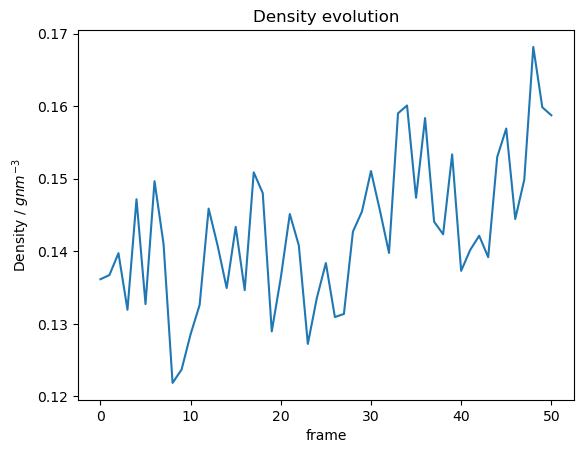

In [13]:
heavy = top.select('not element H')

densities = []
snapshots = range(traj.xyz.shape[0])

m = calc_mass(heavy)

for snap in snapshots:
    points = traj.xyz[snap]
    vol = scipy.spatial.ConvexHull(points).volume
    d = vol / m
    densities.append(d)

pl, ax  = plt.subplots()
ax.set_title('Density evolution')
ax.set_xlabel('frame')
ax.set_ylabel("Density / $g nm^{-3}$")
ax.plot(snapshots, densities)
pl.show()


Plastic and protein contacts quantified

In [ ]:
os.chdir('/home/fkopczynski/paper_cadherin/plastic_protein/plumed/umbrella/')
